### Stereo Disparity for Depth Perception Testing ###

In [1]:
# ref: https://learnopencv.com/introduction-to-epipolar-geometry-and-stereo-vision/
# ref: https://learnopencv.com/depth-perception-using-stereo-camera-python-c/
# ref imgs: https://vision.middlebury.edu/stereo/data/scenes2014/

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [4]:
imgs_path1 = 'C:/Users/Mafeus/Desktop/Bicycle1-perfect'
imgs_path2 = 'C:/Users/Mafeus/Desktop/Bicycle1-imperfect'

In [5]:
# Reading the left and right images of the same scene:
imgL = cv2.imread(imgs_path1 + "/im0.png", 0)
imgR = cv2.imread(imgs_path1 + "/im1.png", 0)

# Setting parameters for StereoSGBM algorithm:
minDisparity = 0;
numDisparities = 64;
blockSize = 8;
disp12MaxDiff = 1;
uniquenessRatio = 10;
speckleWindowSize = 10;
speckleRange = 8;

# Creating an object of StereoSGBM algorithm:
stereo = cv2.StereoSGBM_create(minDisparity = minDisparity,
        numDisparities = numDisparities,
        blockSize = blockSize,
        disp12MaxDiff = disp12MaxDiff,
        uniquenessRatio = uniquenessRatio,
        speckleWindowSize = speckleWindowSize,
        speckleRange = speckleRange
    )

# Calculating disparith using the StereoSGBM algorithm:
disp = stereo.compute(imgL, imgR).astype(np.float32)
disp = cv2.normalize(disp,0,255,cv2.NORM_MINMAX)

# Conversion to 0~255 values:
disp = cv2.cvtColor(disp, cv2.COLOR_GRAY2BGR)
disp = np.floor((disp + (0.004155987))*255)
disp = disp.astype('uint8')

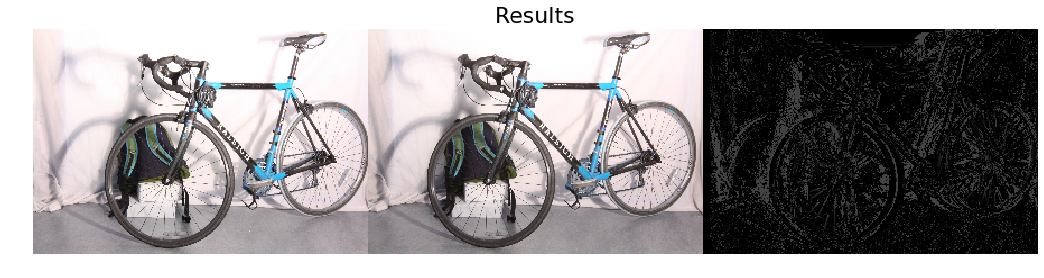

In [6]:
imgL = cv2.imread(imgs_path1 + "/im0.png")
imgR = cv2.imread(imgs_path1 + "/im1.png")
imgs_array = [[imgL, imgR, disp]]
stack = OpCV_Utils.stack_multiple_images(imgs_array, scale = 0.1)
OpCV_Utils.show_single_image_plt(stack, 'Results', fig_size = (18,15))

In [7]:
OpCV_Utils.canny_trackbars(disp.copy(), krnl_size = (2,2), stack_scale=0.5)

Press K to break.

Final Dilation Iterations: 1
Final Erosion Iterations: 0
Final Canny Thresh: (211, 0)
